In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ehull_e3nn_unrelaxed_held_B_0 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_0 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")

ehull_e3nn_unrelaxed_held_B_1 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_1/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_1 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_1/holdout_set_B_sites_predictions.json")

ehull_e3nn_unrelaxed_held_B_2 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_2/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_2 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_2/holdout_set_B_sites_predictions.json")


ehull_e3nn_unrelaxed_test_0 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/test_set_predictions.json")
ehull_CGCNN_unrelaxed_test_0 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/test_set_predictions.json")

ehull_e3nn_unrelaxed_test_1 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_1/test_set_predictions.json")
ehull_CGCNN_unrelaxed_test_1 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_1/test_set_predictions.json")

ehull_e3nn_unrelaxed_test_2 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_2/test_set_predictions.json")
ehull_CGCNN_unrelaxed_test_2 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_2/test_set_predictions.json")


In [5]:
e3nn_mean_pred_ternary = (ehull_e3nn_unrelaxed_held_B_0.predicted_dft_e_hull + ehull_e3nn_unrelaxed_held_B_1.predicted_dft_e_hull+ehull_e3nn_unrelaxed_held_B_2.predicted_dft_e_hull)/3.0

CGCNN_mean_pred_ternary = (ehull_CGCNN_unrelaxed_held_B_0.predicted_dft_e_hull + ehull_CGCNN_unrelaxed_held_B_1.predicted_dft_e_hull+ehull_CGCNN_unrelaxed_held_B_2.predicted_dft_e_hull)/3.0


In [39]:
#https://realpython.com/python-flatten-list/
import numpy as np

def flatten(matrix):
    matrix = list(matrix)
    if isinstance(matrix[0],list):
        out = [item for row in matrix for item in row]
    else:
        out = matrix
    return np.asarray(out)

In [40]:
e3nn_mean_pred_test = (flatten(ehull_e3nn_unrelaxed_test_0.predicted_dft_e_hull) + flatten(ehull_e3nn_unrelaxed_test_1.predicted_dft_e_hull)+flatten(ehull_e3nn_unrelaxed_test_2.predicted_dft_e_hull))/3.0

CGCNN_mean_pred_test = (flatten(ehull_CGCNN_unrelaxed_test_0.predicted_dft_e_hull) + flatten(ehull_CGCNN_unrelaxed_test_1.predicted_dft_e_hull)+flatten(ehull_CGCNN_unrelaxed_test_2.predicted_dft_e_hull))/3.0


In [41]:
import matplotlib.pyplot as plt

In [42]:
ehull_CGCNN_unrelaxed_test_0.dft_e_hull.max()

0.44672706030000003

In [43]:
CGCNN_mean_pred_test.max()

0.4955796400666666

In [44]:
from sklearn import metrics

In [45]:
np.mean(np.abs(ehull_CGCNN_unrelaxed_test_0.dft_e_hull-CGCNN_mean_pred_test))

0.020723977314591597

In [46]:
metrics.r2_score(ehull_CGCNN_unrelaxed_test_0.dft_e_hull,CGCNN_mean_pred_test)

0.8162139235058441

/tmp/ipykernel_145770/3822347582.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


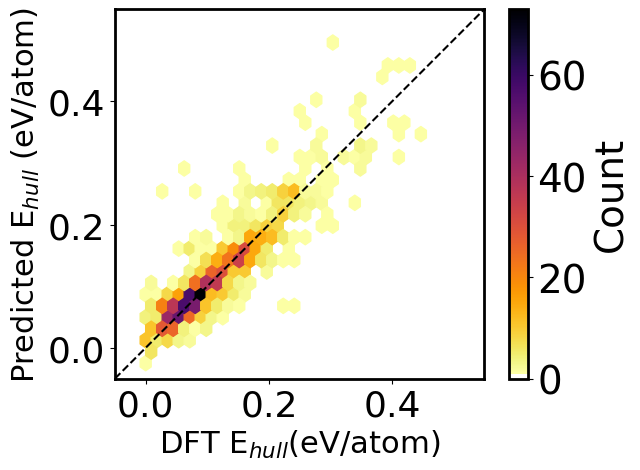

In [73]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')
  
# reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(ehull_CGCNN_unrelaxed_test_0.dft_e_hull,CGCNN_mean_pred_test,cmap=cmap,gridsize=25,mincnt=1)
plt.plot(np.linspace(-0.05,0.6,100),np.linspace(-0.05,0.6,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.05,0.55)
plt.ylim(-0.05,0.55)


plt.xlabel("DFT E$_{hull}$(eV/atom)",size=22)
plt.ylabel("Predicted E$_{hull}$ (eV/atom)",size=22)
plt.xticks([0.0,0.2,0.4],size=26)
plt.yticks([0.0,0.2,0.4],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
#cbar.set_clim(0.0, 10.0)
cbar.set_ticks(ticks = [0,20,40,60],labels=[0,20,40,60],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("test_CGCNN_ensemble.pdf",bbox_inches="tight")

In [64]:
np.mean(np.abs(ehull_CGCNN_unrelaxed_test_0.dft_e_hull-e3nn_mean_pred_test))

0.018010098192677768

In [65]:
metrics.r2_score(ehull_CGCNN_unrelaxed_test_0.dft_e_hull,e3nn_mean_pred_test)

0.853707043676482

/tmp/ipykernel_145770/3907785011.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


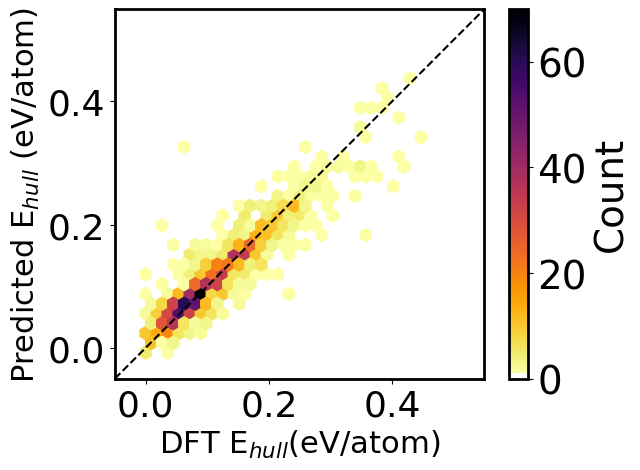

In [71]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')
  
# reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(ehull_CGCNN_unrelaxed_test_0.dft_e_hull,e3nn_mean_pred_test,cmap=cmap,gridsize=25,mincnt=1)
plt.plot(np.linspace(-0.05,0.6,100),np.linspace(-0.05,0.6,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.05,0.55)
plt.ylim(-0.05,0.55)


plt.xlabel("DFT E$_{hull}$(eV/atom)",size=22)
plt.ylabel("Predicted E$_{hull}$ (eV/atom)",size=22)
plt.xticks([0.0,0.2,0.4],size=26)
plt.yticks([0.0,0.2,0.4],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
#cbar.set_clim(0.0, 10.0)
cbar.set_ticks(ticks = [0,20,40,60],labels=[0,20,40,60],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("test_e3nn_ensemble.pdf",bbox_inches="tight")